# Luis Alvaro Correia - Std. no. 1006508566

# Homework No.1 

# Question 3 - Cross Validation

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jan 30 00:30:31 2021
Updated on Sat Jan 30 17:26:02 2021
Updated on Mon Feb 01 10:48:04 2021
Updated on Fri Feb 05 14:43:10 2021 - Include list of weights (as of Piazza @53_1)
Updated on Sun Feb 07 16:03:33 2021 - Include code listing (as of Piazza @84)

@author: Luis Alvaro Correia - Std No.1006508566
"""
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Sets variable for Plotting routines
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rc('font',family='Arial')

## Item (a) Code of 06 Functions for Cross Validation

In [2]:
# Function which takes 'data' as argument and returns its randomly permuted version
# along the samples. Here we consider uniformly random permutation of training data.
def shuffle_data(data):
    sh_idx = np.random.choice(len(data['t']),size=len(data['t']), replace=False)
    data_shf = {'X':data['X'][sh_idx,:], 't':data['t'][sh_idx]}
    return(data_shf)
    
# Function which takes 'data', number of partitions as 'num-folds' and the selected
# partition fold as its arguments and returns the selected partition block 'fold' as
# 'data_fold' and the remaining data as 'data_rest' in 02 disjoint sets.
def split_data(data, num_folds, fold):
   
    # Calculates the size of each fold
    sz_fold = int(len(data['t'])/num_folds) 
    
    # Calculates the limits of validation fold
    idx_fold = list(range((fold-1)*sz_fold, fold*sz_fold-1))
    
    # Calculates the difference of the two sets
    idx_rest = list(set(range(0,len(data['t'])))-set(idx_fold))
    
    # Assign the correct portions of each folder set
    data_fold = {'X':data['X'][idx_fold,:], 't':data['t'][idx_fold]}
    data_rest = {'X':data['X'][idx_rest,:], 't':data['t'][idx_rest]}
    
    return(data_fold, data_rest)
    
# Function which takes 'data' and 'lambd' and returns the coefficients of Ridge Regression
# with penalty level 'lambd' as given in equation (2.1) in HW1.
def train_model(data, lambd):
    phi_prod = np.matmul(np.transpose(data['X']),data['X'])
    inv_phi_lmdb = np.linalg.inv(phi_prod+lambd*np.identity(len(data['X'][0,:])))
    model = np.matmul(np.matmul(inv_phi_lmdb,np.transpose(data['X'])),data['t'])
    return(model)
    
# Function which takes 'data' and 'model' and returns the predictions based in 'data' and
# 'model'.
def predict(data, model):
    predictions = np.matmul(data['X'],model)
    return(predictions)
    
# Function which takes 'data' and 'model' and returns the average squared error loss based
# in 'model'. This means that if 'data' is composed of t and Phi and hat(w) then the return
# will be the norm of ||t - Phi.dat(w)||^2/n
def loss(data, model):
    error = pow(np.linalg.norm(data['t']-np.matmul(data['X'],model)),2)/len(data['t'])
    return(error)
    
# Function that takes the training 'data', number of folds 'num_folds', and a sequence of
# lambdas as 'lambd_seq' as its arguments and return the cross validation error across all
# lambdas. Take 'lambda_seq' as evenly spaced 50 numbers over the the interval (0.02,1.5).
# This means 'cv_error' will be a vector of 50 errors corresponding to the values of 
# 'lambda_seq'.
def cross_validation(data, num_folds, lambd_seq):
    cv_error = np.zeros(len(lambd_seq))
    model = np.zeros((len(lambd_seq),len(data['X'][0,:])))
        
    data = shuffle_data(data)
    for i in range(1,len(lambd_seq)):
        lambd = lambd_seq[i]
        cv_loss_lmd = 0.0
        for fold in range(1,num_folds):
            val_cv, train_cv = split_data(data, num_folds, fold)
            model[i,:] = train_model(train_cv, lambd)
            cv_loss_lmd += loss(val_cv, model[i,:])
        cv_error[i] = cv_loss_lmd/num_folds
    return(cv_error, model)

In [3]:
# Function that takes the training and test data and return the cross validation 
# error across all lambdas for the adjusted model.
def training_test_validation(data_tr, data_tst, lambd_seq):
    cv_error_tr = np.zeros(len(lambd_seq))
    cv_error_tst = np.zeros(len(lambd_seq))
    model = np.zeros((len(lambd_seq),len(data_tr['X'][0,:])))
        
    for i in range(1,len(lambd_seq)):
        lambd = lambd_seq[i]
        model[i,:] = train_model(data_tr, lambd)
        cv_error_tr[i] = loss(data_tr, model[i,:])
        cv_error_tst[i] = loss(data_tst, model[i,:])
    
    return(cv_error_tr, cv_error_tst, model)

In [4]:
'''
Auxiliary function to generate sequences of lambdas for Tidge Regression 
''' 
def generate_seq_lambd(start, end, segments):
    lmbd_lst = []
    if (end < start):
        return(-1)
    lmbd = start
    increment = (end-start)/(segments+1)
    while (lmbd<end):
        lmbd_lst.append(lmbd)
        lmbd += increment
    return lmbd_lst

'''
Plots each error curve obtained after training & testing 
'''
def plot_Graph(err_train, err_tst, cv1, cv2, lambd_seq, name_plt, lb_plot):
    plt.figure(figsize=(12,10))  
    plt.title(name_plt)
    plt.plot(lambd_seq[1:], err_train[1:], label = 'Training'); 
    plt.plot(lambd_seq[1:], err_tst[1:], label = 'Test'); 
    plt.plot(lambd_seq[1:], cv1[1:], label = '5-fold')
    plt.plot(lambd_seq[1:], cv2[1:], label = '10-fold')
    plt.xlabel('Lambda')
    plt.ylabel('Error')
    plt.legend()
    plt.show()
    #plt.savefig(lb_plot)
    #plt.close()
    
'''
List Solution obtained for each procedure, for a set of lambdas
'''
def list_Model(model, lambd_seq, NoLambd, name_lst):
    print('\n----------- Listing of Solutions per Lambda (%s) -----------\n' % name_lst)
    for i in range(1,NoLambd):
        print('\n>>> Lambda - %2.6f\n' % lambd_seq[i])
        print(model[i,:],'\n')

## Item (b) Report of Errors found for each Lambda

In [5]:
# Main program - Initialization procedures, load data, runs Cross Validation
data_train = {'X':np.genfromtxt('data\\data_train_X.csv', delimiter =','),
              't':np.genfromtxt('data\\data_train_y.csv', delimiter = ',')}
data_test = {'X':np.genfromtxt('data\data_test_X.csv', delimiter =','),
             't':np.genfromtxt('data\data_test_y.csv', delimiter = ',')}

np.random.seed(123)   # Set seed to reproduce/test results

lambd_seq = generate_seq_lambd(0.02, 1.5, 50)

# Training and Test Data validation
error_tr, error_tst, model_trained = training_test_validation(data_train, data_test, lambd_seq)

# 5-Fold - Cross Validation
cross_val5, model_val5 = cross_validation(data_train, 5, lambd_seq)

# 10-Fold - Cross Validation
cross_val10, model_val10 = cross_validation(data_train, 10, lambd_seq)

# Part(b) - Print the Errors obtained
d = {'Lambda':lambd_seq,
     'Training':error_tr,
     'CV-5Fold': cross_val5,
     'CV-10Fold': cross_val10,
     'Test':error_tst
     }
df = pd.DataFrame(d)  

# Print errors, Lambdas for each process
print('\n----------- Listing of Errors per procedure -----------\n')
print(df[1:])


----------- Listing of Errors per procedure -----------

      Lambda  Training  CV-5Fold  CV-10Fold      Test
1   0.049020  0.103818  2.743520   3.476450  3.662931
2   0.078039  0.150387  2.537892   3.136742  3.101727
3   0.107059  0.192598  2.417912   2.947510  2.798606
4   0.136078  0.231922  2.341144   2.829452  2.611148
5   0.165098  0.269179  2.289535   2.751205  2.486290
6   0.194118  0.304868  2.253935   2.697550  2.399310
7   0.223137  0.339307  2.229153   2.660130  2.337028
8   0.252157  0.372710  2.212006   2.633949  2.291739
9   0.281176  0.405228  2.200427   2.615830  2.258626
10  0.310196  0.436970  2.193010   2.603657  2.234515
11  0.339216  0.468015  2.188768   2.595964  2.217225
12  0.368235  0.498425  2.186984   2.591704  2.205212
13  0.397255  0.528249  2.187128   2.590112  2.197346
14  0.426275  0.557524  2.188798   2.590618  2.192786
15  0.455294  0.586284  2.191686   2.592785  2.190889
16  0.484314  0.614554  2.195550   2.596279  2.191158
17  0.513333  0.642356  

## Item (c) Graph curves for Training, Test, 5-Fold and 10-Fold errors vs. Lambda

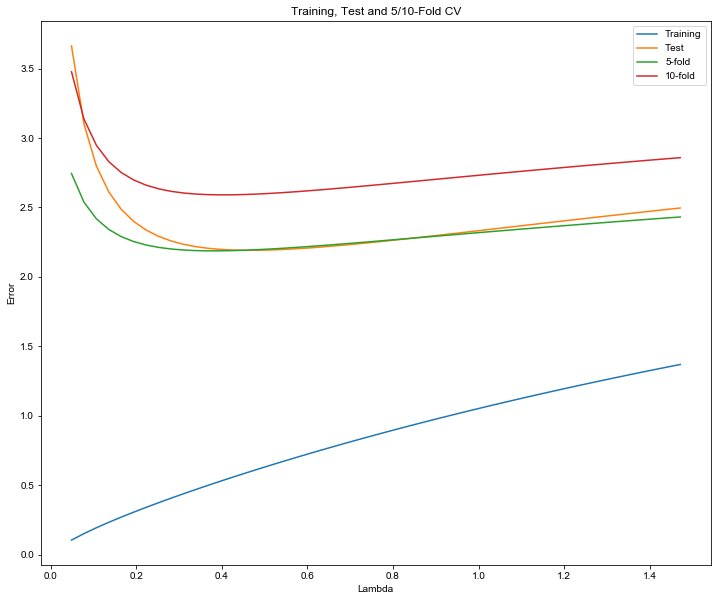

In [6]:
# Part (c) - Plot Graph and prints outputs
plot_Graph(error_tr, error_tst, cross_val5, cross_val10, 
           lambd_seq, 'Training, Test and 5/10-Fold CV', 'TTCV_5_10Fold_v4')

In [7]:
print('\n----------- Processing Summary --------------')

print('\nThe value of lambda proposed by Cross-Validation Procedure is as follows:')
print('\n>>> Minimum Error Lambda for CV-5Fold=%2.6f' % lambd_seq[df[1:].idxmin()['CV-5Fold']])
print('\n>>> Minimum Error Lambda for CV-10Fold=%2.6f' % lambd_seq[df[1:].idxmin()['CV-10Fold']])

print('\n\nThe value of Lambda with best performance after regular training:')
print('\n>>> Minimum Error Lambda after Training=%2.6f' % lambd_seq[df[1:].idxmin()['Test']])

print('\n\nThe errors of best performance K-Fold models over Test Data are:')
print('\n>>> Test Data with Optimum Model 5-Fold=%2.6f' % loss(data_test, model_val5[df[1:].idxmin()['CV-5Fold']]))
print('\n>>> Test Data with Optimum Model 10-Fold=%2.6f' % loss(data_test, model_val10[df[1:].idxmin()['CV-10Fold']]))


----------- Processing Summary --------------

The value of lambda proposed by Cross-Validation Procedure is as follows:

>>> Minimum Error Lambda for CV-5Fold=0.368235

>>> Minimum Error Lambda for CV-10Fold=0.397255


The value of Lambda with best performance after regular training:

>>> Minimum Error Lambda after Training=0.455294


The errors of best performance K-Fold models over Test Data are:

>>> Test Data with Optimum Model 5-Fold=2.227981

>>> Test Data with Optimum Model 10-Fold=2.346600


### Solutions (i.e., weights) with best performance on each process 

In [8]:
print('\n\nThe solutions for the best performance lambda Training Data is as follows:\n')
print(model_trained[df[1:].idxmin()['Test']])

print('\n\nThe solutions for the best performance lambda CV-5Fold is as follows:\n')
print(model_val5[df[1:].idxmin()['CV-5Fold']])

print('\n\nThe solutions for the best performance lambda CV-10Fold  is as follows:\n')
print(model_val10[df[1:].idxmin()['CV-10Fold']])

print('\n\n------ END PROCESSING ------\n')



The solutions for the best performance lambda Training Data is as follows:

[ 1.10982906  0.70759611  0.4880212   0.27723972  0.63233747  1.62403223
  0.80821322  0.3999304   0.92099816  1.79999388  0.16418858  1.0493387
  0.81682761  1.40391724  2.27465072  1.10939477  1.33121177  2.22323946
  2.49863581  1.72160643  0.77309321 -0.366267    0.76686109  0.2402969
  0.14939593 -0.05022322  0.64399356  1.00209217  1.07491236  0.91962546
  2.04755793 -0.55405124 -0.86133074  1.74737866  0.98520395 -1.04458314
  2.22486251  0.18437151  2.01618625  1.0924683   0.10470043  0.95663848
  0.72699351  1.17649083  0.69096513  1.28371773  1.51257601  1.53319849
 -0.21683952  1.26155839  1.15695049  0.38122885  0.80961395  0.73347638
  0.57835984  1.78940537  1.04330747  1.57555265 -0.60227625  0.12735589
  1.79797566  1.25614594  0.28772837  1.56104437 -0.45867559  0.49948881
  0.3483187   0.91610073  0.95866073  2.83954933  1.61605287  2.55646848
  0.67338364  0.91657465  0.40821296  1.50632432

%%latex
\textbf{Comments} - We can see from the graph above that the shapes of error curves for \textit{5-Fold}, \textit{10-Fold} and \textit{Test Data} are similar, in accordance with our expectation: when increasing $\lambda$ we expect the error to decrease up to a point in which we have the minimum error (also called \textit{minimum error $\lambda$}) and then starts to increase slightly from this point on, i.e., as we increase $\lambda$.

In both cases, the error for CV \textit{5-Fold} and \textit{10-Fold} are close to the \textit{minimum error} of the \textit{Test Data} which suggests the process was quite satisfactory in finding a good generalization parameter.

On the other side, the training error increases continuously from $0.103818$ (when $\lambda$ is at the lower limit) up to maximum $\lambda$ in the interval. That behaviour reflects the fact that, when $\lambda$ equals $0$ we have the \textit{non-penalized} regression in which $\hat\boldsymbol{w}_{MAP}$ coincides with the Maximum Likelihood estimator for $\hat\boldsymbol{w}$.



%%latex
\pagebreak
# Appendix - Listing of Solutions obtained by each process

## Solution Listings for Training per Lambda in the interval

In [9]:
## APPENDIX - Solutions Listings

list_Model(model_trained, lambd_seq, 4, 'TRAINING')


----------- Listing of Solutions per Lambda (TRAINING) -----------


>>> Lambda - 0.049020

[ 2.48099418  1.67908036  0.54932535  0.35074591  0.86481408  2.9533251
  1.22685571  0.36114059  1.32174478  2.3292308   1.03383966  2.29157214
  0.58536261  1.29135467  3.19828111  1.45516332  2.32722357  4.40725273
  3.94497043  1.75314422  0.25758318 -0.26031459  1.05095527 -0.23876966
 -0.26260476  0.72974394  0.34787947  1.08476765  0.68737043  0.89471956
  2.50324475  0.2736113  -0.21407806  1.09325478  1.5861415  -2.47732473
  2.2712944   0.17663399  2.01273118  2.26341943  0.18661926  2.09307281
  0.75158441  0.61828027  0.9560902   1.84439305  3.33992123  1.69104188
 -0.99397086  2.74061726  2.11102192  1.15828868  1.16817335 -0.19068659
  0.64938677  2.84957484  1.3035433   3.67996522 -1.00503058 -0.25411831
  1.05631616  0.97887014 -0.30128794  2.19247578 -0.83156834  1.46953485
  1.09371412  0.5163466   1.86445412  3.63943841  3.89540837  3.36371264
 -0.73961884  0.08526776  0.7975

%%latex
\pagebreak
## Solution Listings for CV-5Fold per Lambda in the interval

In [10]:
## APPENDIX - Solutions Listings

list_Model(model_val5, lambd_seq, 4, 'CV-5Fold')


----------- Listing of Solutions per Lambda (CV-5Fold) -----------


>>> Lambda - 0.049020

[ 1.62843348e+00  1.63659519e+00  1.18459826e+00  1.26949541e+00
  1.04952070e+00  9.71740438e-01  2.31504913e+00  1.01016480e+00
  1.24979139e+00  2.26742224e+00  7.72216568e-01  2.12798890e+00
  8.21812898e-01  1.44044708e+00  2.25864756e+00  2.68286701e+00
  1.27759349e+00  2.25002671e+00  2.96076990e+00  2.85963298e+00
  4.59853087e-01  3.89056477e-01  1.45073546e+00  7.33237122e-01
  3.70535613e-01  1.21024511e+00 -4.37316786e-02  1.96187831e+00
  1.23231046e+00  1.72414601e+00  1.93324106e+00  8.33833096e-02
 -1.23826841e+00  1.55512921e+00 -1.49370277e-01 -2.51384139e+00
  1.91700234e+00  1.00878941e+00  2.57800904e+00  2.92913875e+00
  1.01756173e+00  2.68702301e+00  9.55411297e-01  1.77437219e+00
  2.60980710e+00  1.57634754e+00  4.61008744e+00  5.76038201e-01
 -7.56163670e-02  4.55732215e+00  1.38916917e+00  7.37012598e-01
  4.78473407e-01  2.19842625e+00  6.95249494e-01  1.34280256e+

%%latex
\pagebreak
## Solution Listings for CV-10Fold per Lambda in the interval

In [11]:
## APPENDIX - Solutions Listings

list_Model(model_val10, lambd_seq, 4, 'CV-10Fold')


----------- Listing of Solutions per Lambda (CV-10Fold) -----------


>>> Lambda - 0.049020

[ 3.05427807  1.52389077  0.08309995  0.3283696   1.39496597  2.2111421
  1.20131187  1.60233179  1.13300709  2.51828509  0.69099027  2.23552374
  1.04614393  3.22739453  2.2284076   1.06920336  4.24515692  3.05672757
  2.50247209  1.43881809  0.41657625 -0.47211023  1.84383606 -1.32247293
 -1.01881099  0.15123554  0.10391827  0.10943504  1.40254071  0.68261453
  1.62438614  0.23855187  0.50045242  1.32974157  0.35437941 -1.65778253
  2.58266608  0.28390695  1.84247342  2.04070715  0.12163928  1.49112115
  1.18103204  0.84609024  1.88925602  1.17090156  3.36658611  1.69976184
 -0.39671691  1.53430749  2.04212731  1.15010825  1.34346146 -0.21385361
 -0.40439523  1.56430224  0.52523314  2.30985348 -0.8445495  -0.97718669
  1.03523291  1.8331291   0.87506374  0.48694039  0.27535491  0.50696642
  0.31555558 -0.19933326  0.95795166  3.79178079  2.19566711  3.91876746
 -1.11578171  0.55724435  0.988

  2.10011910e+00 -1.44691561e+00  1.83801391e+00  2.83862635e+00] 


>>> Lambda - 0.107059

[ 2.37190972e+00  1.21627927e+00  3.08322673e-01  4.37492760e-01
  1.30325408e+00  1.91321095e+00  1.26940989e+00  1.27118011e+00
  9.93448387e-01  2.50832454e+00  3.18206438e-01  1.92103653e+00
  7.20280943e-01  2.71948925e+00  2.02118811e+00  1.22180572e+00
  3.37149649e+00  2.58431285e+00  2.29204422e+00  1.59951187e+00
  7.43480931e-01 -2.13214011e-01  1.72497586e+00 -7.56102203e-01
 -6.71500073e-01  2.36001992e-01  3.65525608e-01  2.69317092e-01
  1.13426213e+00  9.03451595e-01  1.78048551e+00 -9.42236912e-02
 -3.87785936e-02  1.95978515e+00  4.07989110e-01 -1.32571580e+00
  2.53874828e+00  1.36288111e-01  1.98668687e+00  1.85883276e+00
  2.14350724e-01  1.19621079e+00  1.08166438e+00  1.00649995e+00
  1.67761692e+00  1.19737691e+00  2.60750319e+00  1.66304527e+00
 -3.54005197e-01  1.50230454e+00  1.79900008e+00  8.02063384e-01
  1.02654224e+00  3.68169693e-01  1.07100908e-01  1.77214489e+0